# POSTTEST 6

## WANDA NURHALIZA
## 2109106055

## IMPORT LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

## MEMBACA FILE CSV DAN MENAMPILKAN INFORMASI DARI DATASET

In [3]:
df = pd.read_csv("Star3642_balanced.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


In [4]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


##### KETERANGAN :
###### Vmag = Ukuran Bintang secara Visual
###### Plx = Jarak Antara Bintang dan Bumi
###### e-Plx = Kesalahan Standar Plx
###### B-V = Indeks Warna (Bintang panas memiliki indeks warna B-V mendekati 0 atau negatif, sedangkan bintang dingin memiliki indeks warna B-V mendekati 2,0)
###### SpType = Tipe Spektral
###### Amag = Ukuran Bintang secara Mutlak
###### TargetClass = Yang Menentukan Ukuran Bintang (Kecil = 0 dan Besar = 1)

## DATA SCALING & PEMBUATAN SUBSET

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df_subset = df[["Vmag", "Amag"]]

In [7]:
ss = StandardScaler()

In [8]:
x_scaled = ss.fit_transform(df_subset)

## K - MEANS

In [9]:
from sklearn.cluster import KMeans

In [10]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0)

In [11]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [12]:
labels = model_kmeans.labels_
print(labels)

[1 0 1 ... 1 0 0]


### EVALUASI K-MEANS DENGAN CROSS TAB

In [13]:
df_kmeans = pd.DataFrame({'labels':labels, 'TargetClass' : df.TargetClass})

In [14]:
CT = pd.crosstab(df_kmeans['labels'], df_kmeans['TargetClass'])

In [15]:
print(CT)

TargetClass     0     1
labels                 
0            1022   257
1             521   276
2             278  1288


## MENAMPILKAN CENTROID PADA TIAP CLUSTER

In [16]:
import matplotlib.pyplot as plt

In [17]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [18]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

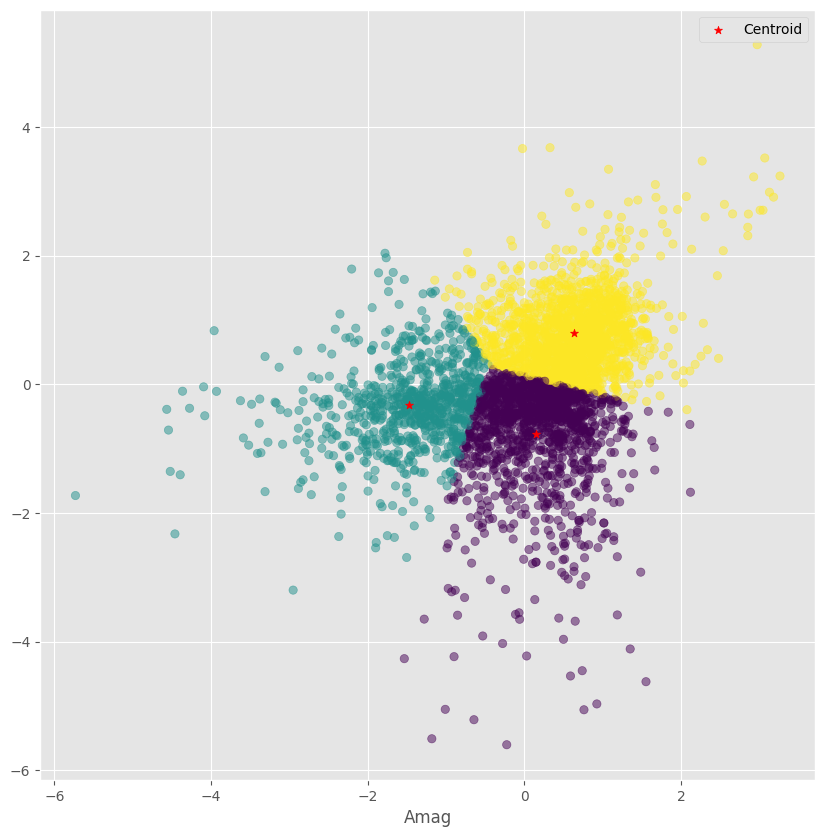

In [19]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = 'red', marker = '*', label = "Centroid")
plt.xlabel("Vmag")
plt.xlabel("Amag")
plt.legend()
plt.show()

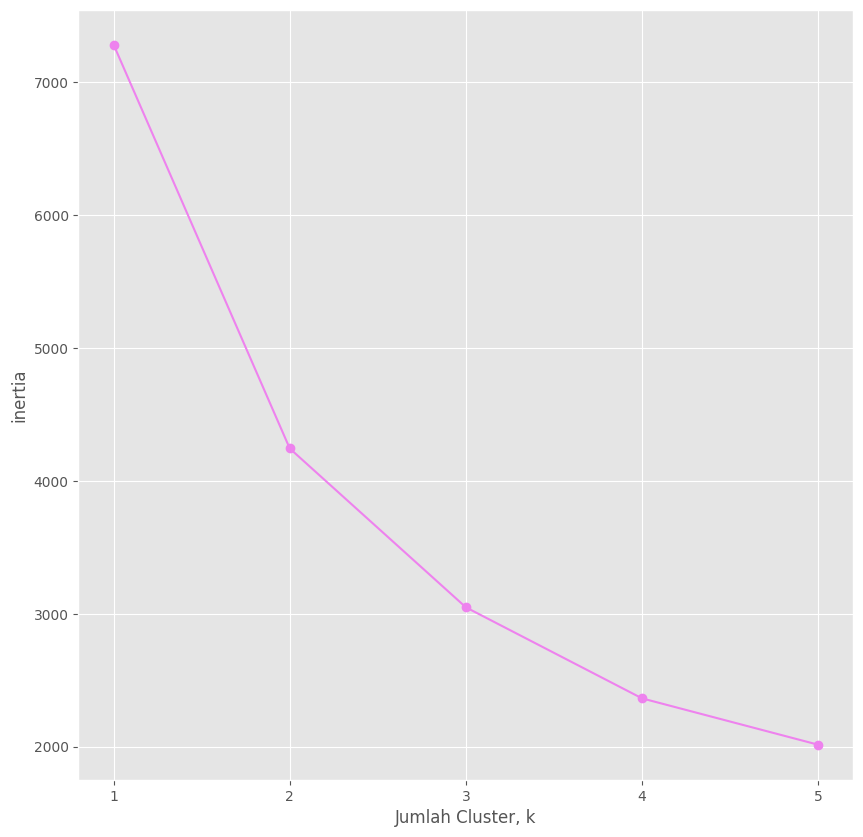

In [20]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (10, 10))
plt.plot(ks, inertias, '-o', c = "violet")
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## EVALUASI

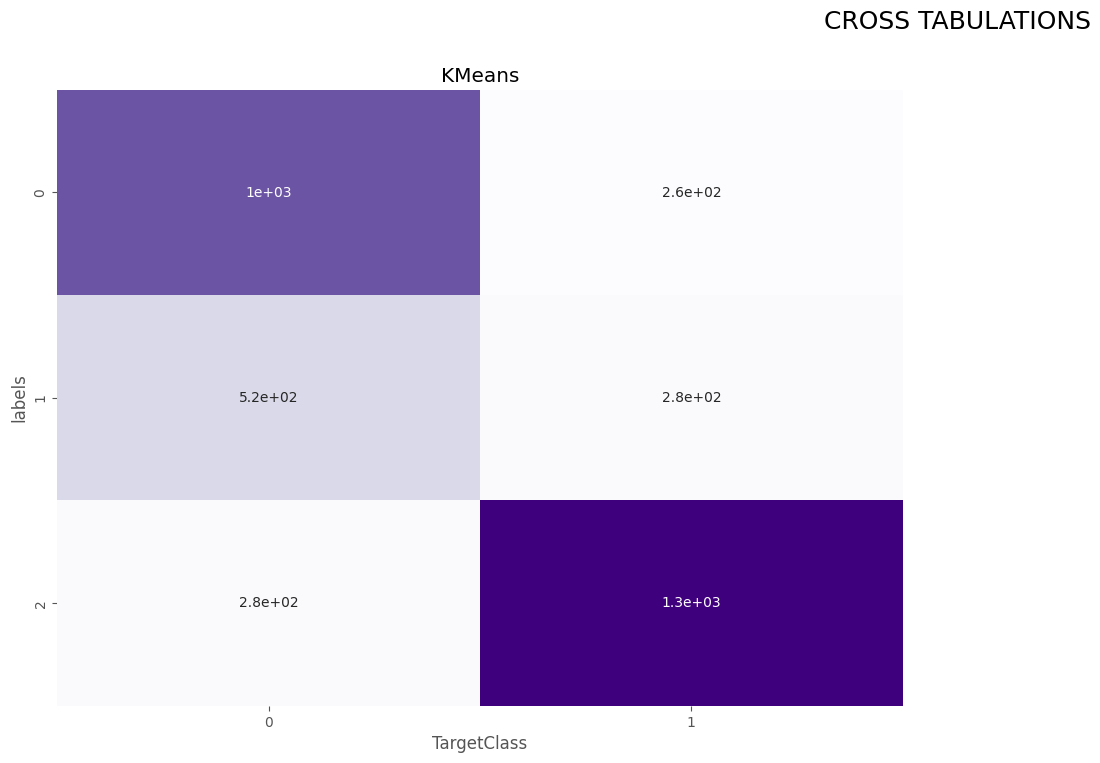

In [21]:
plt.figure(figsize = (24, 8))
plt.suptitle("CROSS TABULATIONS", fontsize = 18)
plt.subplot(1, 2, 1)
plt.title("KMeans")
sns.heatmap(CT, annot = True, cbar = False, cmap = "Purples")
plt.show()